In [105]:
"""
Created on Thu Sep 22 13:06:00 2022

# Explorative Data Analysis Workship 1


The instructions in this file assume that you are using Spyder by Anaconda. 
They might be different if you are using Juypler. For example: Jupyler prints
all columns when you use the command df.head(). Syder just prints some columns, 
and it is desirable to use the Variable Explorer instead. 


# Objective:
    1.- Develop a regression algorithm
    2.- Plot residuals and verify distribution.
    3.- Obtain the R-Squared values
    4.- Analyse Influencial Waypoints
    5.- Cook's Distance
    6.- Predict Values
    
@author: Alejandro Murrieta-Mendoza
"""
# 0: Import all your required libreries 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import pandas as pd
import numpy as np

import math

In [106]:
df = pd.read_csv('./../ws1/amsterdam.csv', index_col=0)
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [107]:
print(df.isna().sum())
print(df.shape)

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64
(924, 7)


In [108]:
df = df[df['Price'].notna()]
print(df.isna().sum())
print(df.shape)

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64
(920, 7)


In [109]:
df.dtypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

In [110]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [111]:
model = sm.OLS(df['Price'], sm.add_constant(df['Area'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2115.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.71e-240
Time:                        21:23:41   Log-Likelihood:                -12897.
No. Observations:                 920   AIC:                         2.580e+04
Df Residuals:                     918   BIC:                         2.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.349e+05   1.91e+04     -7.047      0.000   -1.72e+05   -9.73e+04
Area        7917.5220    172.142     45.994      0.000    7579.685    8255.359
==============================================================================
Omnibus:                      706.946   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39193.876
Skew:                           2.965   Prob(JB):                         0.00
Kurtosis:                      34.421   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
params = model.params
params

const   -134909.922378
Area       7917.521966
dtype: float64

Slope = 7917.5\
Const = -134909.9

Equation:\
$P = -134909.9 + A \cdot 7917.5$

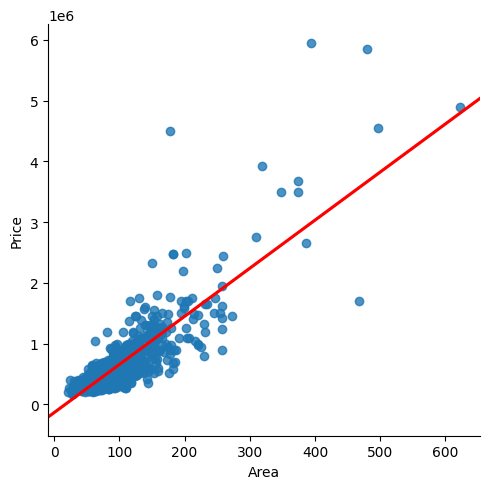

In [113]:
sns.lmplot(data=df, x="Area", y="Price", line_kws={'color': 'red'}, ci=None, truncate=False)

In [114]:
resid = model.resid

largest_indices = resid.apply(lambda x: math.sqrt(x**2)).nlargest(10)

largest_indices   

180    3.220591e+06
196    2.965406e+06
838    2.184499e+06
309    1.867573e+06
34     1.534220e+06
281    1.272282e+06
185    1.161003e+06
288    1.161003e+06
293    1.035570e+06
244    1.008811e+06
dtype: float64

<Axes: xlabel='Area', ylabel='Price'>

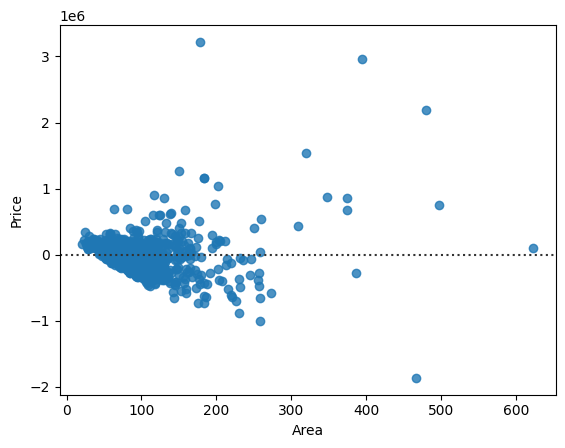

In [115]:
sns.residplot(data=df, x='Area', y='Price')

In [116]:
np.mean(df['Area'])

95.60760869565217

In [117]:
influence = model.get_influence()
influence_summary = influence.summary_frame()

In [118]:
influence_summary.head(10)

,dfb_const,dfb_Area,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,0.034477,-0.019390,0.000795,1.056435,0.001423,0.039884,1.056502,0.039887
2,0.015748,-0.009402,0.000157,0.454920,0.001514,0.017714,0.454724,0.017706
3,0.004179,0.003195,0.000097,0.411131,0.001147,0.013934,0.410945,0.013928
4,-0.000691,-0.018941,0.000731,-1.007007,0.001440,-0.038244,-1.007015,-0.038244
5,0.003453,-0.019739,0.000545,-0.801935,0.001692,-0.033015,-0.801779,-0.033009
6,0.021253,-0.013792,0.000264,0.557597,0.001698,0.022998,0.557387,0.022989
7,-0.007408,0.001751,0.000068,-0.350465,0.001112,-0.011693,-0.350298,-0.011687
8,0.007602,-0.002795,0.000056,0.308632,0.001169,0.010558,0.308480,0.010553
9,0.019752,-0.013323,0.000221,0.492415,0.001818,0.021017,0.492211,0.021008
10,0.028193,-0.021305,0.000414,0.585976,0.002407,0.028781,0.585766,0.028771


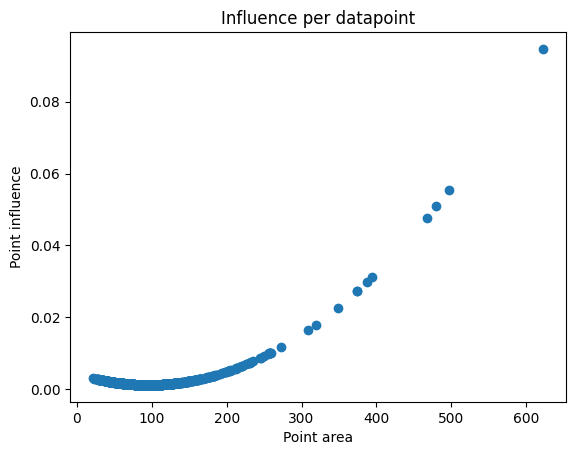

In [119]:
plt.scatter(x=df['Area'], y=influence_summary['hat_diag'])
plt.xlabel("Point area")
plt.ylabel("Point influence")
plt.title("Influence per datapoint")
plt.show()

The vast majority of points on the scatter plot are centered at around 100 m^2 of area, which is also approx. the mean of the area of all houses. This is the 'pivot point' of the graph. The further a datapoint is from this pivot point, the more influence it has on the regression. This is also reflected on the graph above.

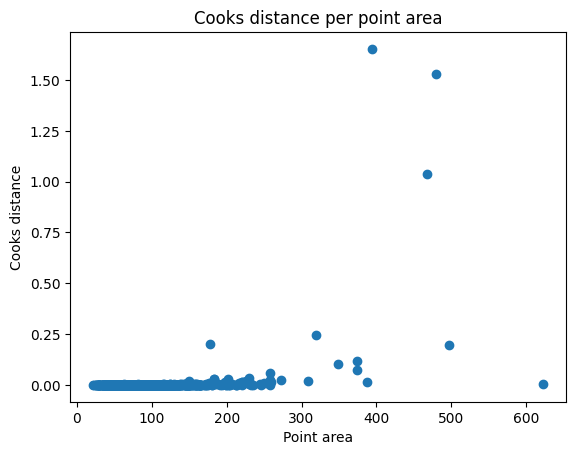

In [120]:
plt.scatter(x=df['Area'], y=influence_summary['cooks_d'])
plt.xlabel("Point area")
plt.ylabel("Cooks distance")
plt.title("Cooks distance per point area")
plt.show()

The graph above visualized the cooks distance for all datapoints in the set. You can see that the cooks distance of the points near the pivot point of the graph is not very high, this is because the influence is pretty low in this range. However, when the area increases, there are some seriously large cooks distances in the graph. This makes sense, as these outliers both have large residuals and have a big influence.

Let's strategize on how to deal with these outliers. Let's first get the mean value of cooks distance.

In [123]:
cooks = influence.cooks_distance[0]
cooks_mean = np.mean(cooks)

cooks_mean

0.0064795318128061845

We can say that any cooks distance value higher than 3 times the cooks mean is an outlier, and should be removed. This is just an assumption, and can be altered if not deemed correct.

In [149]:
outliers = np.where(cooks > cooks_mean * 3)

outliers[0]

array([ 33, 102, 155, 178, 183, 194, 242, 275, 286, 291, 300, 307, 319,
       326, 332, 833, 881])

In [151]:
outliers_df = df.iloc[outliers[0], :]
outliers_df

,Address,Zip,Price,Area,Room,Lon,Lat
34,"Vondelstraat 51 hs, Amsterdam",1054 GJ,3925000.0,319,7,4.875471,52.361571
104,"Westeinde 16, Amsterdam",1017 ZP,4550000.0,497,13,4.898620,52.358798
157,"IJsselmeerstraat 52, Amsterdam",1024 ML,799000.0,230,8,4.961381,52.389087
180,"Dam 5 V, Amsterdam",1012 JS,4495000.0,178,5,4.894290,52.373106
185,"Huidekoperstraat 24 F, Amsterdam",1017 ZM,2475000.0,183,4,4.897473,52.358943
196,"Keizersgracht 544, Amsterdam",1017 EL,5950000.0,394,10,4.887378,52.365078
244,"Uilengouw 2, Amsterdam",1027 EZ,899000.0,258,1,4.967897,52.410672
277,"Sophialaan 45, Amsterdam",1075 BM,3500000.0,374,7,4.857608,52.352366
288,"Huidekoperstraat 24 F, Amsterdam",1017 ZM,2475000.0,183,3,4.897473,52.358943
293,"Vossiusstraat 71, Amsterdam",1071 AK,2500000.0,202,6,4.876117,52.359763


These are the indices of values where the cooks distance is more than 3 times the mean of the cooks distance. Let's drop them and make a new dataframe

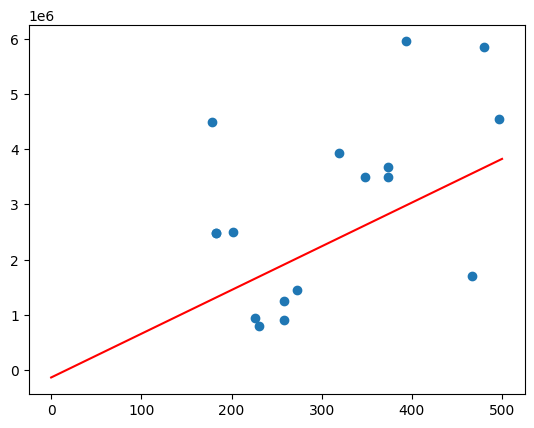

In [166]:
plt.scatter(x=outliers_df['Area'], y=outliers_df['Price'])

reg_x = [0, 500]
reg_y = [params.const, params.const + 500 * params.Area]

plt.plot(reg_x, reg_y, color='red')

In [171]:
model_1_r = model.rsquared

model_1_r

0.6973756063380991

In [1]:
df_filtered = df.drop(df.iloc[outliers[0], :].index, axis=0)

print(f"The old df has {df.shape[0]} rows, the filtered df has {df_filtered.shape[0]} rows")

NameError: name 'df' is not defined

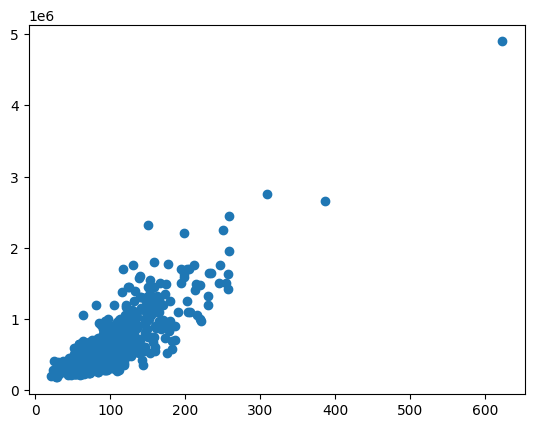

In [182]:
plt.scatter(df_filtered['Area'], df_filtered['Price'])

In [183]:
model_filtered = sm.OLS(df_filtered['Price'], sm.add_constant(df_filtered['Area'])).fit()

model_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2109.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          3.18e-238
Time:                        22:17:17   Log-Likelihood:                -12335.
No. Observations:                 903   AIC:                         2.467e+04
Df Residuals:                     901   BIC:                         2.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.864e+04   1.51e+04     -2.558      0.011   -6.83e+04   -8997.716
Area        6737.0410    146.696     45.925      0.000    6449.135    7024.947
==============================================================================
Omnibus:                      170.625   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.977
Skew:                           0.849   Prob(JB):                    4.87e-144
Kurtosis:                       6.828   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
filtered_params = model_filtered.params
filtered_params

const   -38644.691609
Area      6737.040954
dtype: float64

The new $R^2$ value is 0.701. The new equation:

$P = -38644.7 + A \cdot 6737.0$

We can see that ${\beta}_1$ Decreased by about 300, while the value for ${\beta}_0$ increased greatly, by about 100000.

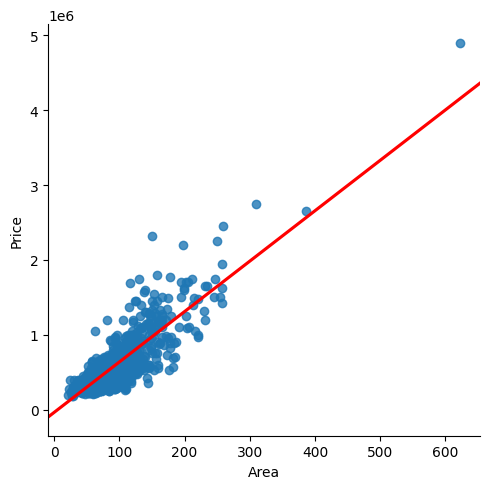

In [185]:
sns.lmplot(data=df_filtered, x="Area", y="Price", line_kws={'color': 'red'}, ci=None, truncate=False)

In [220]:
def predict_price(area):
    price = params.const + area * params.Area
    filtered_price = filtered_params.const + area * filtered_params.Area
    
    print(f"Area: {area:03}, Price: {round(price):,}, with filtered model: {round(filtered_price):,}")

In [221]:
areas = [44, 100, 250, 400, 550]
for area in areas:
    predict_price(area)

Area: 044, Price: 213,461, with filtered model: 257,785
Area: 100, Price: 656,842, with filtered model: 635,059
Area: 250, Price: 1,844,471, with filtered model: 1,645,616
Area: 400, Price: 3,032,099, with filtered model: 2,656,172
Area: 550, Price: 4,219,727, with filtered model: 3,666,728


So, what's happening with the new model, is that lower values for area have a higher predicted price. Higher values for area, on the contrary, have a lower predicted price.